## Requeriments

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Carga

In [45]:
print("--- Iniciando o processo *_* ---")
caminho_do_arquivo = '/content/drive/MyDrive/PI IV/PI/bases/SINAN/CHIKBR24.csv'
try:
    df = pd.read_csv(caminho_do_arquivo, sep=',', encoding='ISO-8859-1', low_memory=False)
    print(f"Arquivo '{caminho_do_arquivo}' carregado com sucesso.")
except FileNotFoundError:
    print(f"ERRO: Arquivo não encontrado. Verifique o caminho.")
    exit()

--- Iniciando o processo *_* ---
Arquivo '/content/drive/MyDrive/PI IV/PI/bases/SINAN/CHIKBR24.csv' carregado com sucesso.


## Entendimento dos dados

In [46]:
# Crição da variavel alvo
df['desfecho_grave'] = 0
df.loc[(df['HOSPITALIZ'] == 1) | (df['EVOLUCAO'] == 2), 'desfecho_grave'] = 1

# Definição das variaveis prediticas (features)
features_demograficas = [
    'NU_IDADE_N', 'CS_SEXO', 'CS_GESTANT', 'CS_RACA'
]
features_clinicas = [
    'FEBRE', 'MIALGIA', 'CEFALEIA', 'EXANTEMA', 'ARTRITE', 'ARTRALGIA'
]
features_comorbidades = [
    'DIABETES', 'HEMATOLOG', 'HEPATOPAT', 'RENAL', 'HIPERTENSA', 'ACIDO_PEPT', 'AUTO_IMUNE'
]

colunas_selecionadas = features_demograficas + features_clinicas + features_comorbidades + ['desfecho_grave']

df_modelo = df[colunas_selecionadas].copy()

# Exploracao
print("\n" + "="*50)
print("VERIFICAÇÃO INICIAL DOS DADOS PARA O MODELO (ainda a)")
print("="*50)

print("\n[VERIFICAÇÃO 1: Balanceamento da Variável-Alvo 'desfecho_grave']")
print("0 = Não Grave (Curado, sem hospitalização)")
print("1 = Grave (Hospitalizado ou Óbito)")
print(df_modelo['desfecho_grave'].value_counts(dropna=False))
print("-"*50)

print("\n[VERIFICAÇÃO 2: Contagem de Dados Nulos (NaN) por Coluna]")
print(df_modelo.isnull().sum())
print("-"*50)

print("\n[VERIFICAÇÃO 3: Tipos de Dados das Colunas Selecionadas]")
df_modelo.info()
print("-"*50)

print("\n[VERIFICAÇÃO 4: Análise das Colunas Específicas de Dengue]")
colunas_dengue_suspeitas = ['GRAV_PULSO', 'GRAV_CONV', 'GRAV_HEMAT']
for coluna in colunas_dengue_suspeitas:
    if coluna in df.columns:
        contagem_nao_nulos = df[coluna].notna().sum()
        print(f"Coluna '{coluna}' tem {contagem_nao_nulos} valores preenchidos (não nulos).")
    else:
        print(f"Coluna '{coluna}' não encontrada no DataFrame.")
print("Se esses números forem muito baixos ou zero, confirma nossa hipótese de que não se aplicam à Chikungunya.")
print("="*50)


VERIFICAÇÃO INICIAL DOS DADOS PARA O MODELO (ainda a)

[VERIFICAÇÃO 1: Balanceamento da Variável-Alvo 'desfecho_grave']
0 = Não Grave (Curado, sem hospitalização)
1 = Grave (Hospitalizado ou Óbito)
desfecho_grave
0    390825
1     11983
Name: count, dtype: int64
--------------------------------------------------

[VERIFICAÇÃO 2: Contagem de Dados Nulos (NaN) por Coluna]
NU_IDADE_N           0
CS_SEXO              2
CS_GESTANT          43
CS_RACA              1
FEBRE             8339
MIALGIA           8339
CEFALEIA          8339
EXANTEMA          8339
ARTRITE           8339
ARTRALGIA         8339
DIABETES          8339
HEMATOLOG         8339
HEPATOPAT         8339
RENAL             8339
HIPERTENSA        8339
ACIDO_PEPT        8339
AUTO_IMUNE        8339
desfecho_grave       0
dtype: int64
--------------------------------------------------

[VERIFICAÇÃO 3: Tipos de Dados das Colunas Selecionadas]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402808 entries, 0 to 402807
Data columns

## Preparação dos Dados

In [47]:
# Crição da variavel alvo
df['desfecho_grave'] = 0
df.loc[(df['HOSPITALIZ'] == 1) | (df['EVOLUCAO'] == 2), 'desfecho_grave'] = 1

# Definição das variaveis prediticas (features)
features_demograficas = [
    'NU_IDADE_N', 'CS_SEXO', 'CS_GESTANT', 'CS_RACA'
]
features_clinicas = [
    'FEBRE', 'MIALGIA', 'CEFALEIA', 'EXANTEMA', 'ARTRITE', 'ARTRALGIA'
]
features_comorbidades = [
    'DIABETES', 'HEMATOLOG', 'HEPATOPAT', 'RENAL', 'HIPERTENSA', 'ACIDO_PEPT', 'AUTO_IMUNE'
]

colunas_selecionadas = features_demograficas + features_clinicas + features_comorbidades + ['desfecho_grave']

df_modelo = df[colunas_selecionadas].copy()


print(f"\nFormato original do df_modelo: {df_modelo.shape}")

# 1. Tratamento de Dados Faltantes: Remover as linhas com qualquer valor nulo
df_modelo.dropna(inplace=True)
print(f"Formato após remover linhas com dados nulos: {df_modelo.shape}")

# 2. Correção dos Tipos de Dados (Dtypes)
# Seleciona todas as colunas que são float e as converte para inteiro
colunas_float = df_modelo.select_dtypes(include='float64').columns
for col in colunas_float:
    df_modelo[col] = df_modelo[col].astype(np.int64)
print("\nTipos de dados corrigidos para inteiro.")

# Cria a coluna de idade real
df_modelo['IDADE_REAL'] = df_modelo['NU_IDADE_N'].apply(lambda x: x % 1000 if str(x).startswith('4') else x)

# Filtra o DataFrame para remover idades implausíveis
idade_minima = 0
idade_maxima = 110

registros_antes = df_modelo.shape[0]
df_modelo = df_modelo[(df_modelo['IDADE_REAL'] >= idade_minima) & (df_modelo['IDADE_REAL'] <= idade_maxima)]
registros_depois = df_modelo.shape[0]
print(f"Foram removidos {registros_antes - registros_depois} registros com idades implausíveis.")
print(f"DataFrame 'df_modelo' finalizado e limpo com {df_modelo.shape[0]} registros.")


Formato original do df_modelo: (402808, 18)
Formato após remover linhas com dados nulos: (394424, 18)

Tipos de dados corrigidos para inteiro.
Foram removidos 3580 registros com idades implausíveis.
DataFrame 'df_modelo' finalizado e limpo com 390844 registros.


## Exploração Inicial


Estatísticas descritivas para a Idade (após limpeza):
count    390844.000000
mean         38.893697
std          20.029481
min           0.000000
25%          23.000000
50%          38.000000
75%          54.000000
max         110.000000
Name: IDADE_REAL, dtype: float64

Frequência para Diabetes:
DIABETES
Não    0.948099
Sim    0.051901
Name: proportion, dtype: float64

Frequência para Hipertensão:
HIPERTENSA
Não    0.878686
Sim    0.121314
Name: proportion, dtype: float64

Correlação das variáveis com 'desfecho_grave':
desfecho_grave    1.000000
RENAL             0.045412
DIABETES          0.041541
HIPERTENSA        0.035977
AUTO_IMUNE        0.030480
HEMATOLOG         0.026468
HEPATOPAT         0.023200
CS_SEXO           0.020844
EXANTEMA          0.007305
ACIDO_PEPT        0.003419
FEBRE             0.003203
NU_IDADE_N       -0.005556
IDADE_REAL       -0.005921
CS_GESTANT       -0.019487
ARTRITE          -0.036848
CS_RACA          -0.038367
ARTRALGIA        -0.045174
MIALGIA       

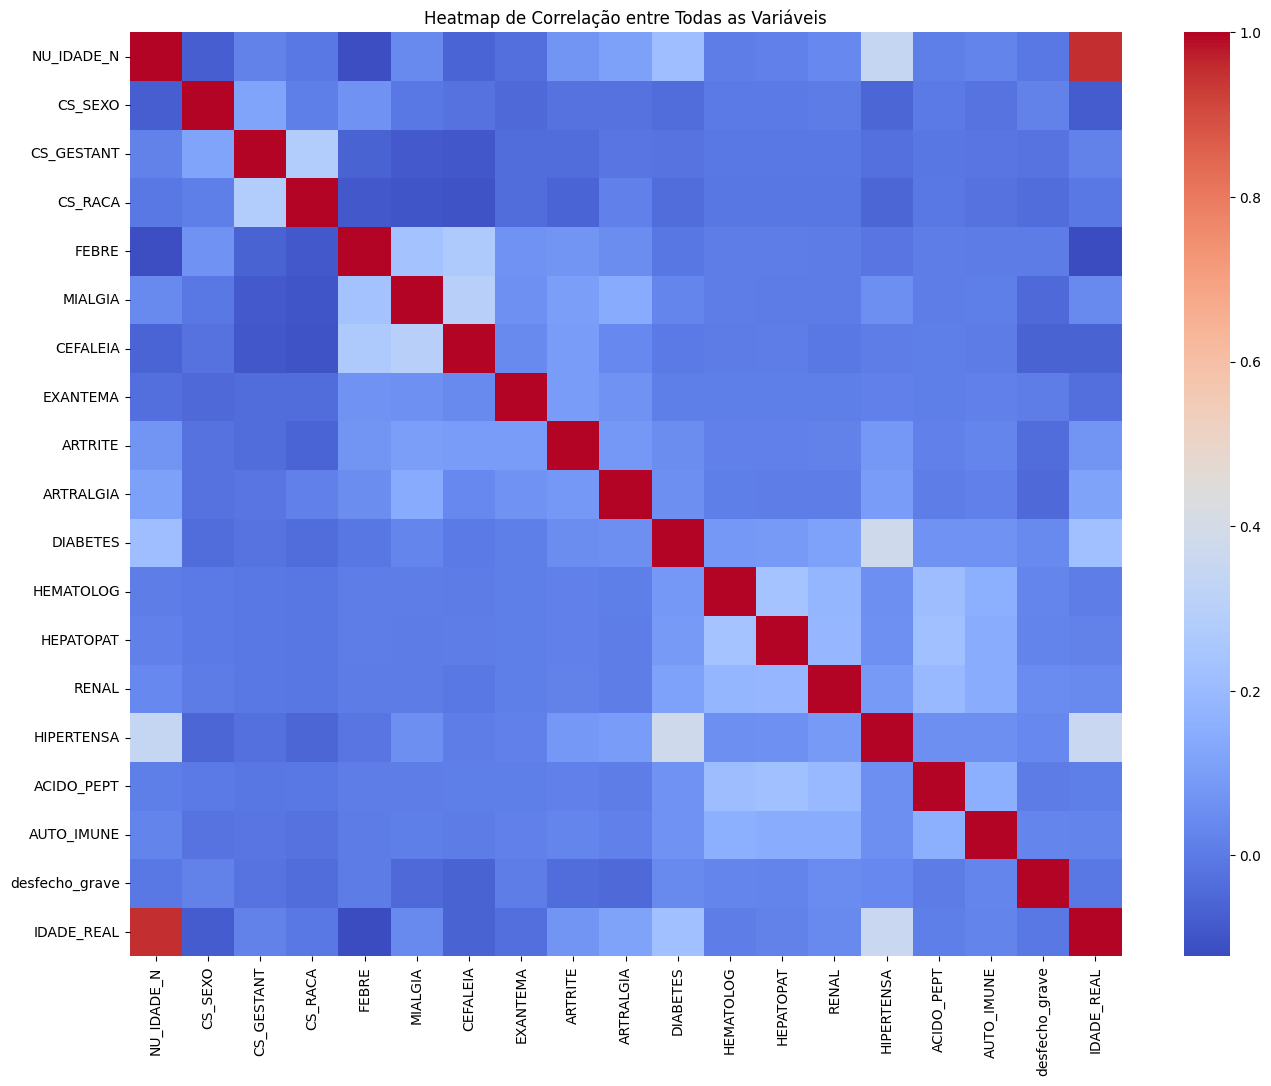

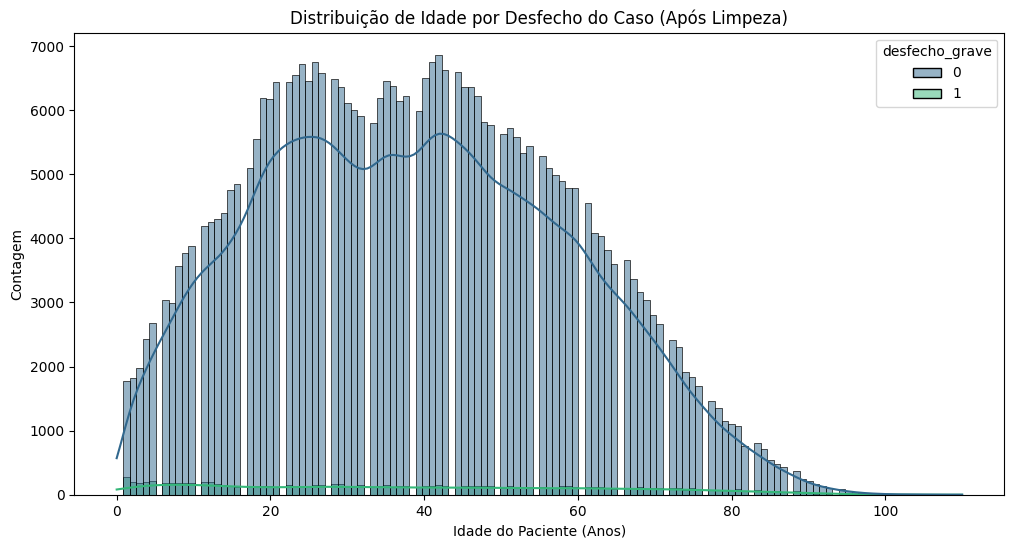

/tmp/ipython-input-3214737443.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_modelo, x='desfecho_grave', y='IDADE_REAL', palette='viridis')


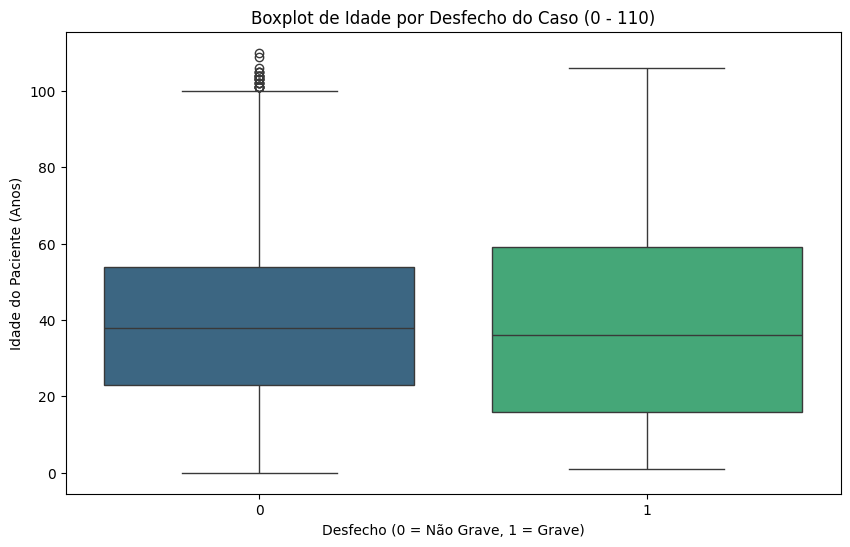

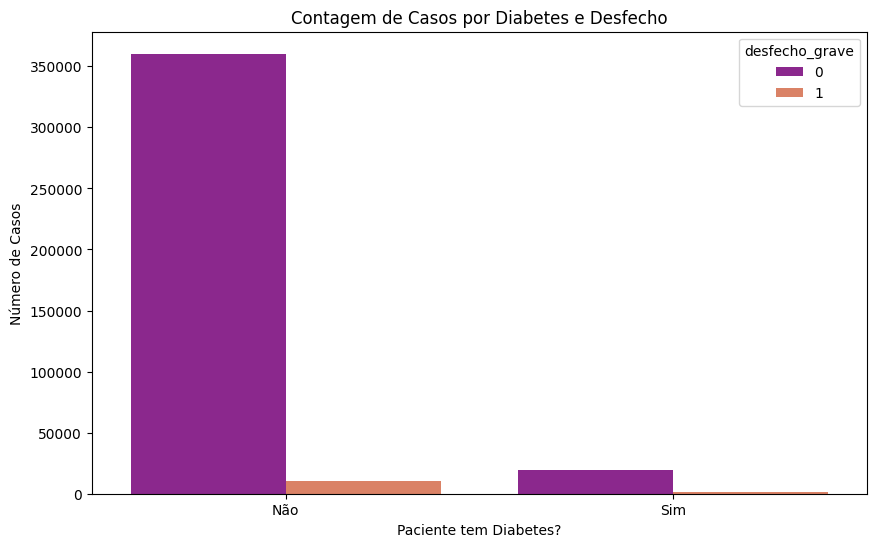

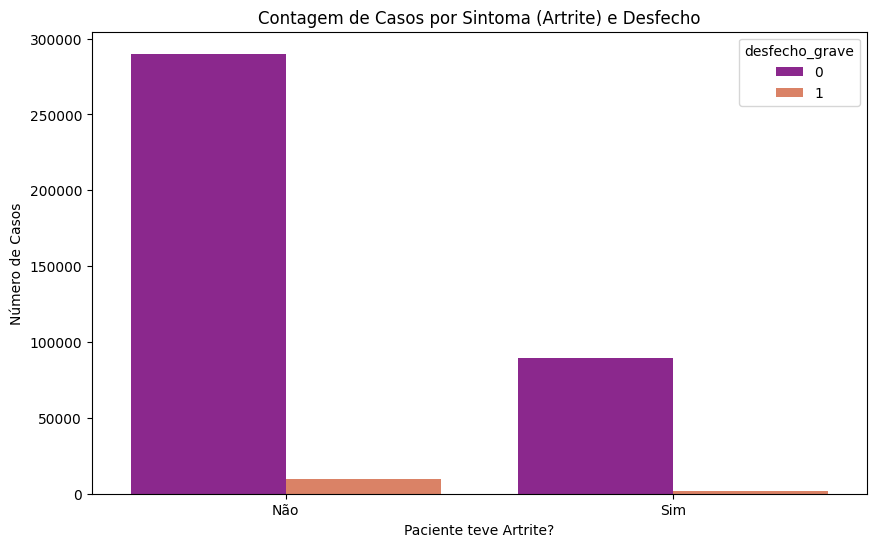

In [48]:
# --- ANÁLISE EXPLORATÓRIA DE DADOS (EDA) ---
# 4.1. Estatísticas Descritivas
mapeamento_sim_nao = {1: 'Sim', 2: 'Não'}
print("\nEstatísticas descritivas para a Idade (após limpeza):")
print(df_modelo['IDADE_REAL'].describe())
print("\nFrequência para Diabetes:")
print(df_modelo['DIABETES'].map(mapeamento_sim_nao).value_counts(normalize=True))
print("\nFrequência para Hipertensão:")
print(df_modelo['HIPERTENSA'].map(mapeamento_sim_nao).value_counts(normalize=True))

# 4.2. Análise de Correlação
df_corr = df_modelo.copy()
mapeamento_sexo = {'M': 1, 'F': 0, 'I': 2}
df_corr['CS_SEXO'] = df_corr['CS_SEXO'].map(mapeamento_sexo)
for col in features_clinicas + features_comorbidades:
    df_corr[col] = df_corr[col].replace(2, 0)
correlation_matrix = df_corr.corr()
print("\nCorrelação das variáveis com 'desfecho_grave':")
print(correlation_matrix['desfecho_grave'].sort_values(ascending=False))

# 4.3. Visualizações Gráficas
print("\nGerando visualizações gráficas...")

# Heatmap de Correlação
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Heatmap de Correlação entre Todas as Variáveis')
plt.savefig('heatmap_correlacao.png')
plt.show()

# Distribuição
plt.figure(figsize=(12, 6))
sns.histplot(data=df_modelo, x='IDADE_REAL', hue='desfecho_grave', kde=True, palette='viridis')
plt.title('Distribuição de Idade por Desfecho do Caso (Após Limpeza)')
plt.xlabel('Idade do Paciente (Anos)')
plt.ylabel('Contagem')
plt.savefig('distribuicao_idade.png')
plt.show()

# Boxplot de Idade
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_modelo, x='desfecho_grave', y='IDADE_REAL', palette='viridis')
plt.title('Boxplot de Idade por Desfecho do Caso (0 - 110)')
plt.xlabel('Desfecho (0 = Não Grave, 1 = Grave)')
plt.ylabel('Idade do Paciente (Anos)')
plt.savefig('boxplot_idade.png')
plt.show()

df_plot_diabetes = df_modelo.copy()
df_plot_diabetes['DIABETES'] = df_plot_diabetes['DIABETES'].map(mapeamento_sim_nao)
plt.figure(figsize=(10, 6))
sns.countplot(data=df_plot_diabetes, x='DIABETES', hue='desfecho_grave', palette='plasma')
plt.title('Contagem de Casos por Diabetes e Desfecho')
plt.xlabel('Paciente tem Diabetes?')
plt.ylabel('Número de Casos')
plt.savefig('diabetes_vs_desfecho.png')
plt.show()

df_plot_artrite = df_modelo.copy()
df_plot_artrite['ARTRITE'] = df_plot_artrite['ARTRITE'].map(mapeamento_sim_nao)
plt.figure(figsize=(10, 6))
sns.countplot(data=df_plot_artrite, x='ARTRITE', hue='desfecho_grave', palette='plasma')
plt.title('Contagem de Casos por Sintoma (Artrite) e Desfecho')
plt.xlabel('Paciente teve Artrite?')
plt.ylabel('Número de Casos')
plt.savefig('artrite_vs_desfecho.png')
plt.show()

## PREPARAÇÃO FINAL PRA MODELAGEM

In [49]:
print("\n--- Iniciando a Preparação Final para Modelagem ---")

# 5.1. One-Hot Encoding
colunas_para_encoder = ['CS_SEXO', 'CS_GESTANT', 'CS_RACA', 'FEBRE', 'MIALGIA', 'CEFALEIA',
                        'EXANTEMA', 'ARTRITE', 'ARTRALGIA', 'DIABETES', 'HEMATOLOG',
                        'HEPATOPAT', 'RENAL', 'HIPERTENSA', 'ACIDO_PEPT', 'AUTO_IMUNE']

df_final = pd.get_dummies(df_modelo, columns=colunas_para_encoder, drop_first=True)
print("Variáveis categóricas transformadas para o formato do modelo.")

# 5.2. Verificação do DataFrame Final
print("\n" + "="*50)
print("DATASET FINAL - PRONTO PARA A MODELAGEM")
print("="*50)
print("\nCinco primeiras linhas do DataFrame final:")
print(df_final.head())
print("\n\nInformações do DataFrame final:")
df_final.info()

print("\n--- Processo concluído com sucesso! ---")


--- Iniciando a Preparação Final para Modelagem ---
Variáveis categóricas transformadas para o formato do modelo.

DATASET FINAL - PRONTO PARA A MODELAGEM

Cinco primeiras linhas do DataFrame final:
   NU_IDADE_N  desfecho_grave  IDADE_REAL  CS_SEXO_I  CS_SEXO_M  CS_GESTANT_2  \
0        4037               1          37      False       True         False   
1        4037               0          37      False      False         False   
2        4029               0          29      False       True         False   
3        4056               0          56      False      False         False   
4        4058               0          58      False      False         False   

   CS_GESTANT_3  CS_GESTANT_4  CS_GESTANT_5  CS_GESTANT_6  ...  EXANTEMA_2  \
0         False         False         False          True  ...        True   
1         False         False         False          True  ...        True   
2         False         False         False          True  ...        True   
3